### A problematic approach

In [10]:
from __future__ import division, print_function

%matplotlib inline
import matplotlib.pyplot as plt

from skimage import color
image = color.rgb2gray(plt.imread('../images/stefan.jpg'))

import numpy as np

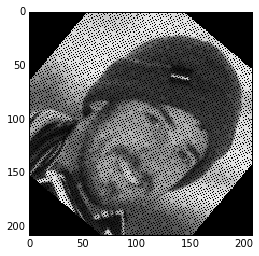

In [30]:
def rotate(image, theta):
    theta = np.deg2rad(theta)
    
    height, width = image.shape[:2]
    out = np.zeros_like(image)
    
    centre_x, centre_y = width / 2., height / 2.
    
    for x in range(width):
        for y in range(height):
            
            x_c = x - centre_x
            y_c = y - centre_y
            
            # Determine polar coordinate of pixel
            radius = np.sqrt(x_c**2 + y_c**2)
            angle = np.arctan2(y_c, x_c)
            
            new_angle = angle + theta
            
            new_x = radius * np.cos(new_angle)
            new_y = radius * np.sin(new_angle)
            
            new_x = new_x + centre_x
            new_y = new_y + centre_y
            
            if (new_x >= width) or (new_x < 0) or\
               (new_y >= height) or (new_y < 0):
                    continue
            else:
                out[new_y, new_x] = image[y, x]
    
    return out

rotated = rotate(image, 40)
    
plt.imshow(rotated, cmap='gray', interpolation='nearest');

## And while we can attempt to fix the problem

...this is not the "right" approach

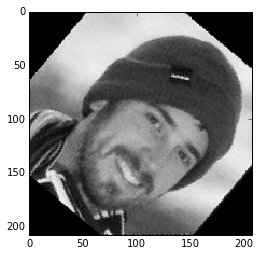

In [31]:
# Attempt at fixing the holes using a median filter
# -- it works, sort of, but it's not the best approach.

height, width = rotated.shape[:2]

out = rotated.copy()

for x in range(1, width - 1):
    for y in range(1, height - 1):
        if out[y, x] == 0:
            out[y, x] = np.median([out[y, x-1],
                                   out[y, x+1],
                                   out[y+1, x],
                                   out[y-1, x]])
            
plt.imshow(out, cmap='gray', interpolation='nearest');

# Correct solution, using interpolation

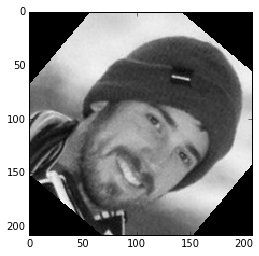

In [32]:
def interp(x, y, vals):
    """Bilinear interpolation.
    
    Parameters
    ----------
    x, y : float
        Position of required value inside a 1x1 pixel.
    vals : list of 4 floats
        Values on the four corners of the pixels, in order
        top left, top right, bottom left, bottom right.
        
    Returns
    -------
    v : float
        Interpolated value at position ``(x, y)``.
    
    """
    top_left, top_right, bottom_left, bottom_right = vals
    
    top_middle = (1 - x) * top_left + x * top_right
    bottom_middle = (1 - x) * bottom_left + x * bottom_right
    
    return (1 - y) * top_middle + y * bottom_middle


def rotate(image, theta):
    theta = np.deg2rad(theta)
    
    height, width = image.shape[:2]
    out = np.zeros_like(image)
    
    centre_x, centre_y = width / 2., height / 2.
    
    for x in range(width):
        for y in range(height):
            
            x_c = x - centre_x
            y_c = y - centre_y
            
            # Determine polar coordinate of pixel
            radius = np.sqrt(x_c**2 + y_c**2)
            angle = np.arctan2(y_c, x_c)
            
            new_angle = angle - theta
            
            old_x = radius * np.cos(new_angle)
            old_y = radius * np.sin(new_angle)
            
            old_x = old_x + centre_x
            old_y = old_y + centre_y
            
            if (old_x >= width - 1) or (old_x < 1) or\
               (old_y >= height - 1) or (old_y < 1):
                    continue
            else:
                xx = np.floor(old_x)
                yy = np.floor(old_y)
                
                out[y, x] = interp(old_x - xx, old_y - yy,
                                   [image[yy, xx], image[yy, xx + 1],
                                    image[yy + 1, xx], image[yy + 1, xx + 1]])
    
    return out

rotated = rotate(image, 40)
    
plt.imshow(rotated, cmap='gray', interpolation='nearest');